In [19]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.inspection import permutation_importance

In [2]:
# Import our input dataset
df = pd.read_csv('Data/ML_ready_data.csv')
df.head()

,id,season,neutral_site,home_team_x,home_conference,home_points,home_pregame_elo,away_team_x,away_conference,away_points,away_pregame_elo,spread,margin
0,400763593,2015,False,UCF,American Athletic,14,1626,Florida International,Conference USA,15,1321,-17.0,1
1,400603840,2015,True,South Carolina,SEC,17,1646,North Carolina,ACC,13,1477,-3.5,-4
2,400763399,2015,False,Central Michigan,Mid-American,13,1417,Oklahoma State,Big 12,24,1567,20.5,11
3,400603839,2015,False,Vanderbilt,SEC,12,1365,Western Kentucky,Conference USA,14,1521,-17.5,2
4,400756883,2015,False,Utah,Pac-12,24,1603,Michigan,Big Ten,17,1553,-3.0,-7


In [3]:
train_df = df.query("season != 2022")
test_df = df.query("season == 2022")

In [4]:
football_df = train_df.drop(["id","season","home_team_x","away_team_x","home_points","away_points"],axis=1).dropna()

football_df.head()

,neutral_site,home_conference,home_pregame_elo,away_conference,away_pregame_elo,spread,margin
0,False,American Athletic,1626,Conference USA,1321,-17.0,1
1,True,SEC,1646,ACC,1477,-3.5,-4
2,False,Mid-American,1417,Big 12,1567,20.5,11
3,False,SEC,1365,Conference USA,1521,-17.5,2
4,False,Pac-12,1603,Big Ten,1553,-3.0,-7


In [5]:
# Generate our categorical variable lists
football_cat = football_df.dtypes[football_df.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(football_df[football_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(football_cat)
encode_df.head()

,home_conference_ACC,home_conference_American Athletic,home_conference_Big 12,home_conference_Big Ten,home_conference_Conference USA,home_conference_FBS Independents,home_conference_Mid-American,home_conference_Mountain West,home_conference_Pac-12,home_conference_SEC,...,away_conference_Ivy,away_conference_Mid-American,away_conference_Mountain West,away_conference_OVC,away_conference_Pac-12,away_conference_Patriot,away_conference_SEC,away_conference_SWAC,away_conference_Southern,away_conference_Sun Belt
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Merge one-hot encoded features and drop the originals
merged_df = football_df.merge(encode_df,left_index=True, right_index=True)
merged_df = merged_df.drop(football_cat,axis=1)
merged_df.head()

,neutral_site,home_pregame_elo,away_pregame_elo,spread,margin,home_conference_ACC,home_conference_American Athletic,home_conference_Big 12,home_conference_Big Ten,home_conference_Conference USA,...,away_conference_Ivy,away_conference_Mid-American,away_conference_Mountain West,away_conference_OVC,away_conference_Pac-12,away_conference_Patriot,away_conference_SEC,away_conference_SWAC,away_conference_Southern,away_conference_Sun Belt
0,False,1626,1321,-17.0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,True,1646,1477,-3.5,-4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,1417,1567,20.5,11,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,1365,1521,-17.5,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,1603,1553,-3.0,-7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Convert boolean values to int
merged_df["neutral_site"]=merged_df["neutral_site"].astype(int)
merged_df.head()

,neutral_site,home_pregame_elo,away_pregame_elo,spread,margin,home_conference_ACC,home_conference_American Athletic,home_conference_Big 12,home_conference_Big Ten,home_conference_Conference USA,...,away_conference_Ivy,away_conference_Mid-American,away_conference_Mountain West,away_conference_OVC,away_conference_Pac-12,away_conference_Patriot,away_conference_SEC,away_conference_SWAC,away_conference_Southern,away_conference_Sun Belt
0,0,1626,1321,-17.0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1646,1477,-3.5,-4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1417,1567,20.5,11,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1365,1521,-17.5,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1603,1553,-3.0,-7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
mu = np.average(merged_df.margin)
sigma = np.std(merged_df.margin)
    
#Set boundaries
lowerb = mu - 2*sigma # Lower limit 
upperb = mu + 2*sigma # Upper limit
    
#update outliers to boundary limits
merged_df['margin']= merged_df['margin'].clip(lowerb, upperb)

In [9]:
# Split our preprocessed data into our features and target arrays
y = merged_df.margin
X = merged_df.drop(columns=["margin"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(y.shape, X.shape)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

(4775,) (4775, 34)


In [11]:
# Create a random forest classifier.
rf_model = RandomForestRegressor(n_estimators=128, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)


In [13]:
X_predict = scaler.fit(X)
X_predict_scaled = X_predict.transform(X)
prediction = rf_model.predict(X_predict_scaled)

In [15]:
predict_df = pd.DataFrame([train_df.home_team_x,
                           train_df.home_points,
                           train_df.away_team_x,
                           train_df.away_points,
                           train_df.spread,
                           train_df.margin,
                           prediction]).transpose()
predict_df.rename(columns = {"Unnamed 0":"Prediction"}, inplace = True)
predict_df

,home_team_x,home_points,away_team_x,away_points,spread,margin,Prediction
0,UCF,14,Florida International,15,-17.0,1,-21.686957
1,South Carolina,17,North Carolina,13,-3.5,-4,-4.039062
2,Central Michigan,13,Oklahoma State,24,20.5,11,14.168525
3,Vanderbilt,12,Western Kentucky,14,-17.5,2,-12.850747
4,Utah,24,Michigan,17,-3.0,-7,-4.25
...,...,...,...,...,...,...,...
4770,Alabama,41,Georgia,24,6.5,-17,-13.5625
4771,Iowa,3,Michigan,42,12.0,39,7.023438
4772,Wake Forest,21,Pittsburgh,45,3.5,24,3.049309
4773,California,24,USC,14,-4.5,-10,-0.695312


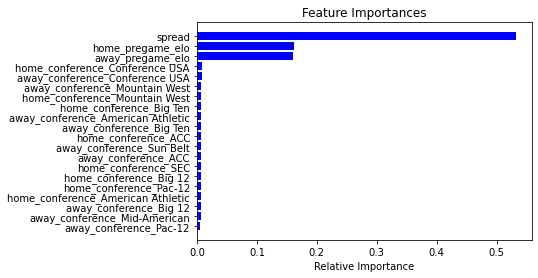

In [18]:
plt.title('Feature Importances')

top_features = 20
features = X.columns
importances = rf_model.feature_importances_
index = np.argsort(importances)

plt.barh(range(top_features), importances[index[-top_features:]], color='b', align='center')
plt.yticks(range(top_features), [features[i] for i in index[-top_features:]])
plt.xlabel('Relative Importance')
plt.show()